##### Copyright 2024 Google LLC.

In [2]:
// @title Licensed under the Apache License, Version 2.0 (the "License");
//
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
//     https://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/gemini-2/get_started.ipynb"><img src="https://ai.google.dev/site-assets/images/docs/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](#scrollTo=nyZMoM6tgnTA)
* Using [function calling](#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](#scrollTo=enBhuaIk3KYa)
* Using [context caching](#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [3]:
const GEMINI_API_KEY=Deno.env.get('GEMINI_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [4]:
import { GoogleGenAI, Type, createPartFromUri } from "npm:@google/genai@0.10.0";


const client = new  GoogleGenAI({apiKey: GEMINI_API_KEY})

### Choose a model

This notebook will teach you how to use the [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) model with the GenAI SDK. But the SDK also work with the 1.5 generation of models.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [ ]:
const MODEL_ID = "gemini-2.0-flash" // @param ["gemini-1.5-flash-8b","gemini-1.5-flash-002","gemini-1.5-pro-002","gemini-2.0-flash-exp"] {"allow-input":true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content`, and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [6]:
const response1 = await client.models.generateContent({
    model: MODEL_ID,
    contents: "What's the largest planet in our solar system?"

})

Deno.jupyter.md`${response1.text}`

The largest planet in our solar system is **Jupiter**.

It's much larger than all the other planets combined, both in terms of mass and volume.

## Count tokens

You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [7]:
const response2 = await client.models.countTokens({
    model: MODEL_ID,
    contents: "What's the highest mountain in Africa?"
})

response2

CountTokensResponse { totalTokens: 10 }

## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

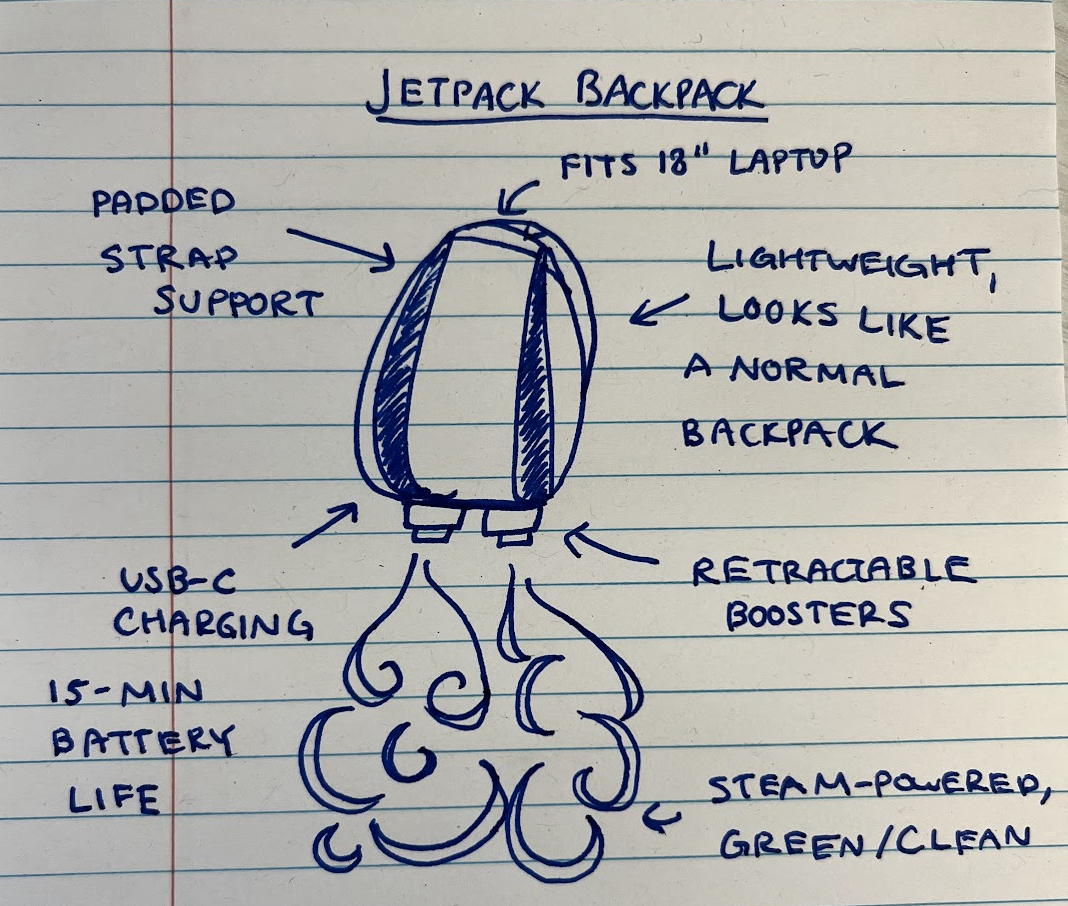

In [8]:
const IMG1 = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"
const imgPath1 = "jetpack.png"
await fetch(IMG1).then(r=>r.body?.pipeTo(Deno.openSync(imgPath1, {create: true, write: true}).writable))
Deno.jupyter.image(imgPath1)

In [9]:
import { Jimp } from "npm:jimp@1.6.0"

const image = await Jimp.read(imgPath1)
const imageBase64 = await image.getBuffer("image/png").then(b => b.toString("base64"))

const response3 = await client.models.generateContent({
    model: MODEL_ID,
    contents: [
        { inlineData: { data: imageBase64, mimeType: "image/png" } },
        "Write a short and engaging blog post based on this picture."
    ]
})

Deno.jupyter.md`${response3.text}`;

## Spotted: The Jetpack Backpack - Is This the Future?

We stumbled upon a truly imaginative concept sketch today that got our minds soaring (literally!). Forget traffic and crowded commutes – the "Jetpack Backpack" is here, at least in blueprint form, and it promises a revolutionary way to get around while keeping your essentials handy.

Based on this neat notebook drawing, this isn't just any backpack. Sure, it offers padded strap support for comfort and is designed to look like a normal backpack, even fitting a sizable 18" laptop inside. That makes it practical for your daily grind.

But the real magic happens below! This concept features retractable boosters, hinting at a hidden power source ready for takeoff. And the coolest part? The sketch points to a **steam-powered, green/clean** propulsion system! Imagine gliding above the streets on environmentally friendly steam.

Charging is modern and convenient via USB-C. There's a note about a 15-minute battery life – perhaps perfect for quick hops across town, bypassing a traffic jam, or making a dramatic entrance!

While just a sketch for now, this "Jetpack Backpack" is a fantastic blend of everyday utility and futuristic fantasy. It makes you wonder: could this kind of personal, clean air travel really be on the horizon? We're ready to pre-order the moment it leaves the drawing board!

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [12]:
const response4 = await client.models.generateContent(
    {
        model: MODEL_ID,
        contents: "Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
        config: {
            temperature:0.4,
            topP:0.95,
            topK:20,
            candidateCount:1,
            seed:5,
            maxOutputTokens:100,
            stopSequences:["STOP!"],
            presencePenalty:0.0,
            frequencyPenalty:0.0,
        }
    }
    )

Deno.jupyter.md`${response4.text}`

Okay, woof woof! Imagine the internet is like a HUGE playground filled with squeaky toys!

*   **You (Your Computer/Phone):** You're a little puppy with a favorite squeaky toy! You want to show it to your friend, another puppy across the playground.

*   **The Squeaky Toy (Data):** Your squeaky toy is like a message or a picture you want to send. It's your special "woof!"

*   **Your Human (Router/Modem):** Your human helps you get the squeaky toy to your friend. They pack it in a special box and give it to the mailman. They are like your home network.

*   **The Mailman (Internet Service Provider - ISP):** The mailman takes your squeaky toy box and knows how to get it to the right part of the playground. They have lots of trucks and routes!

*   **The Playground Roads (Fiber Optic Cables/Wireless Signals):** These are the roads the mailman uses to drive the squeaky toy box across the playground. Some are fast and smooth (fiber), some are a little bouncy (wireless).

*   **The Big Playground Map (DNS Servers):** The mailman needs a map to know where your friend lives on the playground. The map tells them that "PuppyFriend's House" is at a specific spot.

*   **Your Friend's Human (Router/Modem):** Your friend's human is like your human, but on the other side of the playground. They unpack the squeaky toy box and give it to your friend.

*   **Your Friend (Another Computer/Phone):** Your friend gets your squeaky toy! They see your "woof!" and maybe they send their own squeaky toy back to you!

So, you send your squeaky toy (data) through your human (router), the mailman (ISP) uses the playground map (DNS) to find your friend, and your friend gets your squeaky toy! Then they can send one back! Squeak, squeak, squeak! It's all about sending squeaky toys back and forth across the playground! Good puppy!


## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what's appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In [16]:
import {
  HarmBlockThreshold,
  HarmCategory,
} from "npm:@google/genai@0.10.0";

const userPrompt = "Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark."
const safetySettings = [{
    category: HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT,
    threshold: HarmBlockThreshold.BLOCK_ONLY_HIGH,
  }]

const response5 = await client.models.generateContent(
  {
      model: MODEL_ID,
      contents: userPrompt,
      config: { safetySettings }
  }
  )

Deno.jupyter.md`${response5.text}`

Okay, here are two examples of disrespectful things someone might say to the universe after stubbing their toe in the dark:

1.  "Seriously, Universe?! What was that for?! Are you messing with me?!" (Implies the universe deliberately caused the pain)
2.  "Oh, F*** you, Universe! Did you enjoy that?!" (Direct insult and accusation of malicious intent)

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [17]:
const systemInstruction1=`
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
`

const chat = client.chats.create(
    {
      model: MODEL_ID,
      config: {
        systemInstruction: systemInstruction1,
        temperature: 0.5
      }
    },
  );

Use `chat.sendMessage` to pass a message back and receive a response.

In [ ]:
const response6 = await chat.sendMessage({message: "Write a function that checks if a year is a leap year."})

Deno.jupyter.md`${response6.text}`

Okay, here's a function in several common programming languages to check if a year is a leap year based on the standard Gregorian calendar rules.

The rules are:
1.  A year is a leap year if it is divisible by 4.
2.  However, if the year is divisible by 100, it is *not* a leap year...
3.  ...UNLESS the year is also divisible by 400.

Let's implement this logic.

---

**Python**

```python
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Args:
    year (int): The year to check.

  Returns:
    bool: True if the year is a leap year, False otherwise.
  """
  # Rule 1: Divisible by 4
  # Rule 2: Except if divisible by 100
  # Rule 3: Unless also divisible by 400
  return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Examples ---
print(f"1900 is a leap year? {is_leap_year(1900)}") # False (divisible by 100, not 400)
print(f"2000 is a leap year? {is_leap_year(2000)}") # True (divisible by 400)
print(f"2020 is a leap year? {is_leap_year(2020)}") # True (divisible by 4, not 100)
print(f"2021 is a leap year? {is_leap_year(2021)}") # False (not divisible by 4)
```

---

**Java**

```java
public class LeapYearChecker {

    /**
     * Checks if a given year is a leap year according to the Gregorian calendar rules.
     *
     * @param year The year to check.
     * @return True if the year is a leap year, False otherwise.
     */
    public static boolean isLeapYear(int year) {
        // Rule 1: Divisible by 4
        // Rule 2: Except if divisible by 100
        // Rule 3: Unless also divisible by 400
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Examples ---
    public static void main(String[] args) {
        System.out.println("1900 is a leap year? " + isLeapYear(1900)); // False
        System.out.println("2000 is a leap year? " + isLeapYear(2000)); // True
        System.out.println("2020 is a leap year? " + isLeapYear(2020)); // True
        System.out.println("2021 is a leap year? " + isLeapYear(2021)); // False
    }
}
```

---

**JavaScript**

```javascript
/**
 * Checks if a given year is a leap year according to the Gregorian calendar rules.
 *
 * @param {number} year The year to check.
 * @returns {boolean} True if the year is a leap year, False otherwise.
 */
function isLeapYear(year) {
  // Rule 1: Divisible by 4
  // Rule 2: Except if divisible by 100
  // Rule 3: Unless also divisible by 400
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// --- Examples ---
console.log(`1900 is a leap year? ${isLeapYear(1900)}`); // False
console.log(`2000 is a leap year? ${isLeapYear(2000)}`); // True
console.log(`2020 is a leap year? ${isLeapYear(2020)}`); // True
console.log(`2021 is a leap year? ${isLeapYear(2021)}`); // False
```

---

**C++**

```cpp
#include <iostream>

/**
 * Checks if a given year is a leap year according to the Gregorian calendar rules.
 *
 * @param year The year to check.
 * @return True if the year is a leap year, False otherwise.
 */
bool isLeapYear(int year) {
    // Rule 1: Divisible by 4
    // Rule 2: Except if divisible by 100
    // Rule 3: Unless also divisible by 400
    return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
}

// --- Examples ---
int main() {
    std::cout << "1900 is a leap year? " << (isLeapYear(1900) ? "True" : "False") << std::endl; // False
    std::cout << "2000 is a leap year? " << (isLeapYear(2000) ? "True" : "False") << std::endl; // True
    std::cout << "2020 is a leap year? " << (isLeapYear(2020) ? "True" : "False") << std::endl; // True
    std::cout << "2021 is a leap year? " << (isLeapYear(2021) ? "True" : "False") << std::endl; // False
    return 0;
}
```

---

**Explanation of the Logic:**

The core of the function in each language is the boolean expression:
`(year % 4 == 0 && year % 100 != 0) || (year % 400 == 0)`

Let's break it down:

*   `year % 4 == 0`: Checks if the year is divisible by 4. This is the primary rule.
*   `year % 100 != 0`: Checks if the year is *not* divisible by 100. This handles the first exception (Rule 2).
*   `(year % 4 == 0 && year % 100 != 0)`: This part checks for years divisible by 4 but *not* by 100 (e.g., 2020, 2024). These are leap years.
*   `year % 400 == 0`: Checks if the year is divisible by 400. This handles the second exception (Rule 3).
*   `||`: The `OR` operator. The year is a leap year if *either* the first condition is true (divisible by 4 but not 100) *or* the second condition is true (divisible by 400). This correctly implements all three rules.

Choose the language you need, and you can use the provided function.

In [19]:
const response7 = await chat.sendMessage({message: "Okay, write a unit test of the generated function."})

Deno.jupyter.md`${response7.text}`

Okay, let's write unit tests for the `is_leap_year` function using common testing frameworks for each language.

We will test the key cases:

1.  A standard leap year (divisible by 4, not 100).
2.  A standard non-leap year (not divisible by 4).
3.  A century year that is *not* a leap year (divisible by 100, not 400).
4.  A century year that *is* a leap year (divisible by 400).

---

**Python (using `unittest`)**

First, make sure your `is_leap_year` function is in a file, let's say `leap_year.py`:

```python
# leap_year.py
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.
  """
  return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)
```

Now, the test file, let's say `test_leap_year.py`:

```python
# test_leap_year.py
import unittest
from leap_year import is_leap_year # Assuming your function is in leap_year.py

class TestLeapYear(unittest.TestCase):

    def test_standard_leap_year(self):
        # Years divisible by 4 but not 100 should be leap years
        self.assertTrue(is_leap_year(2020))
        self.assertTrue(is_leap_year(2024))
        self.assertTrue(is_leap_year(1996))

    def test_standard_non_leap_year(self):
        # Years not divisible by 4 should not be leap years
        self.assertFalse(is_leap_year(2021))
        self.assertFalse(is_leap_year(2022))
        self.assertFalse(is_leap_year(1999))

    def test_century_not_leap_year(self):
        # Years divisible by 100 but not 400 should not be leap years
        self.assertFalse(is_leap_year(1900))
        self.assertFalse(is_leap_year(2100))
        self.assertFalse(is_leap_year(1800))

    def test_century_leap_year(self):
        # Years divisible by 400 should be leap years
        self.assertTrue(is_leap_year(2000))
        self.assertTrue(is_leap_year(1600))
        self.assertTrue(is_leap_year(2400))

# How to run the tests:
# Save the function in leap_year.py and the tests in test_leap_year.py
# Open your terminal or command prompt, navigate to the directory
# where you saved the files, and run:
# python -m unittest test_leap_year.py
# Or simply:
# python -m unittest
# (if the file is named test_*.py)

# Optional: Add this block to run tests directly from the script
if __name__ == '__main__':
    unittest.main()
```

---

**Java (using JUnit 5)**

You'll need to include JUnit 5 in your project dependencies (e.g., via Maven or Gradle).

Assuming your `LeapYearChecker` class is in `LeapYearChecker.java`:

```java
// LeapYearChecker.java
public class LeapYearChecker {
    public static boolean isLeapYear(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}
```

Now, the test file, typically named `LeapYearCheckerTest.java`:

```java
// LeapYearCheckerTest.java
import org.junit.jupiter.api.Test;
import static org.junit.jupiter.api.Assertions.*;

// Assuming LeapYearChecker.java is in the same package or accessible
// import com.yourpackage.LeapYearChecker; // Adjust if using packages

class LeapYearCheckerTest {

    @Test
    void testStandardLeapYear() {
        // Years divisible by 4 but not 100 should be leap years
        assertTrue(LeapYearChecker.isLeapYear(2020));
        assertTrue(LeapYearChecker.isLeapYear(2024));
        assertTrue(LeapYearChecker.isLeapYear(1996));
    }

    @Test
    void testStandardNonLeapYear() {
        // Years not divisible by 4 should not be leap years
        assertFalse(LeapYearChecker.isLeapYear(2021));
        assertFalse(LeapYearChecker.isLeapYear(2022));
        assertFalse(LeapYearChecker.isLeapYear(1999));
    }

    @Test
    void testCenturyNotLeapYear() {
        // Years divisible by 100 but not 400 should not be leap years
        assertFalse(LeapYearChecker.isLeapYear(1900));
        assertFalse(LeapYearChecker.isLeapYear(2100));
        assertFalse(LeapYearChecker.isLeapYear(1800));
    }

    @Test
    void testCenturyLeapYear() {
        // Years divisible by 400 should be leap years
        assertTrue(LeapYearChecker.isLeapYear(2000));
        assertTrue(LeapYearChecker.isLeapYear(1600));
        assertTrue(LeapYearChecker.isLeapYear(2400));
    }
}

// How to run the tests:
// This depends on your build setup (Maven, Gradle, or manual compilation).
// With Maven, place the test file in src/test/java/ and run 'mvn test'.
// With Gradle, place the test file in src/test/java/ and run 'gradle test'.
// In an IDE like IntelliJ or Eclipse, you can usually right-click the test file
// and choose "Run Tests".
```

---

**JavaScript (using Jest)**

First, make sure you have Node.js and npm installed. Install Jest:
`npm install --save-dev jest`

Make sure your `isLeapYear` function is in a file, let's say `leapYear.js`:

```javascript
// leapYear.js
/**
 * Checks if a given year is a leap year.
 */
function isLeapYear(year) {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// Export the function so it can be imported in the test file
module.exports = isLeapYear;
```

Now, the test file, typically named `leapYear.test.js`:

```javascript
// leapYear.test.js
const isLeapYear = require('./leapYear'); // Import the function

describe('isLeapYear', () => {

  test('should return true for standard leap years', () => {
    // Years divisible by 4 but not 100 should be leap years
    expect(isLeapYear(2020)).toBe(true);
    expect(isLeapYear(2024)).toBe(true);
    expect(isLeapYear(1996)).toBe(true);
  });

  test('should return false for standard non-leap years', () => {
    // Years not divisible by 4 should not be leap years
    expect(isLeapYear(2021)).toBe(false);
    expect(isLeapYear(2022)).toBe(false);
    expect(isLeapYear(1999)).toBe(false);
  });

  test('should return false for century years not divisible by 400', () => {
    // Years divisible by 100 but not 400 should not be leap years
    expect(isLeapYear(1900)).toBe(false);
    expect(isLeapYear(2100)).toBe(false);
    expect(isLeapYear(1800)).toBe(false);
  });

  test('should return true for century years divisible by 400', () => {
    // Years divisible by 400 should be leap years
    expect(isLeapYear(2000)).toBe(true);
    expect(isLeapYear(1600)).toBe(true);
    expect(isLeapYear(2400)).toBe(true);
  });

});

// How to run the tests:
// 1. Make sure you have Node.js and npm installed.
// 2. In your project directory, run `npm install --save-dev jest`.
// 3. Add a script to your package.json file:
//    "scripts": {
//      "test": "jest"
//    }
// 4. Save the function in leapYear.js and the tests in leapYear.test.js
// 5. Open your terminal in the project directory and run:
//    npm test
```

---

**C++ (using Google Test)**

You'll need to set up Google Test in your C++ project. This typically involves downloading the source and building it, or using a package manager/build system integration.

Assuming your `isLeapYear` function is in a file like `leap_year.h`:

```cpp
// leap_year.h
#ifndef LEAP_YEAR_H
#define LEAP_YEAR_H

bool isLeapYear(int year);

#endif // LEAP_YEAR_H
```

And the implementation in `leap_year.cpp`:

```cpp
// leap_year.cpp
#include "leap_year.h"

bool isLeapYear(int year) {
    return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
}
```

Now, the test file, let's say `leap_year_test.cpp`:

```cpp
// leap_year_test.cpp
#include "leap_year.h" // Include your function header
#include <gtest/gtest.h> // Include Google Test header

// Test case for standard leap years
TEST(LeapYearTest, StandardLeapYear) {
    // Years divisible by 4 but not 100 should be leap years
    ASSERT_TRUE(isLeapYear(2020));
    ASSERT_TRUE(isLeapYear(2024));
    ASSERT_TRUE(isLeapYear(1996));
}

// Test case for standard non-leap years
TEST(LeapYearTest, StandardNonLeapYear) {
    // Years not divisible by 4 should not be leap years
    ASSERT_FALSE(isLeapYear(2021));
    ASSERT_FALSE(isLeapYear(2022));
    ASSERT_FALSE(isLeapYear(1999));
}

// Test case for century years not divisible by 400
TEST(LeapYearTest, CenturyNotLeapYear) {
    // Years divisible by 100 but not 400 should not be leap years
    ASSERT_FALSE(isLeapYear(1900));
    ASSERT_FALSE(isLeapYear(2100));
    ASSERT_FALSE(isLeapYear(1800));
}

// Test case for century years divisible by 400
TEST(LeapYearTest, CenturyLeapYear) {
    // Years divisible by 400 should be leap years
    ASSERT_TRUE(isLeapYear(2000));
    ASSERT_TRUE(isLeapYear(1600));
    ASSERT_TRUE(isLeapYear(2400));
}

// The main function to run the tests
int main(int argc, char **argv) {
    ::testing::InitGoogleTest(&argc, argv);
    return RUN_ALL_TESTS();
}

// How to run the tests:
// This requires Google Test to be set up in your project and linked correctly.
// The compilation and running process depends heavily on your build system
// (e.g., CMake, Makefiles).
// A typical CMake setup would involve adding Google Test and compiling
// leap_year.cpp and leap_year_test.cpp together into a test executable.
// Then you run the generated executable.
```

---

These tests cover the essential rules for determining a leap year and should give you confidence that the function is working correctly for these standard cases. Remember to set up the appropriate testing framework for your chosen language.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as JavaScript Objects.

In [20]:
const recipe = {
    type: Type.OBJECT,
    properties: {
      recipeName: {type: Type.STRING },
      recipeDescription: {type: Type.STRING },
      recipeIngredients: {type: Type.ARRAY, items: {type: Type.STRING} }
    }
}

const response8 = await client.models.generateContent(
  {
      model: MODEL_ID,
      contents: "List 3 popular cookie recipes and their ingredients.",
      config: {
        responseMimeType: "application/json",
        responseSchema: recipe,
      }
  })

Deno.jupyter.md`${response8.text}`

{"recipeDescription": "A classic, simple, and delicious sugar cookie perfect for cutting into shapes and decorating.", "recipeIngredients": ["1 cup (2 sticks) unsalted butter, softened", "1 1/2 cups granulated sugar", "2 large eggs", "1 teaspoon vanilla extract", "2 3/4 cups all-purpose flour", "1 teaspoon baking powder", "1/4 teaspoon salt"], "recipeName": "Classic Sugar Cookies"}

## Generate Images

Gemini can output images directly as part of a conversation:

image/png


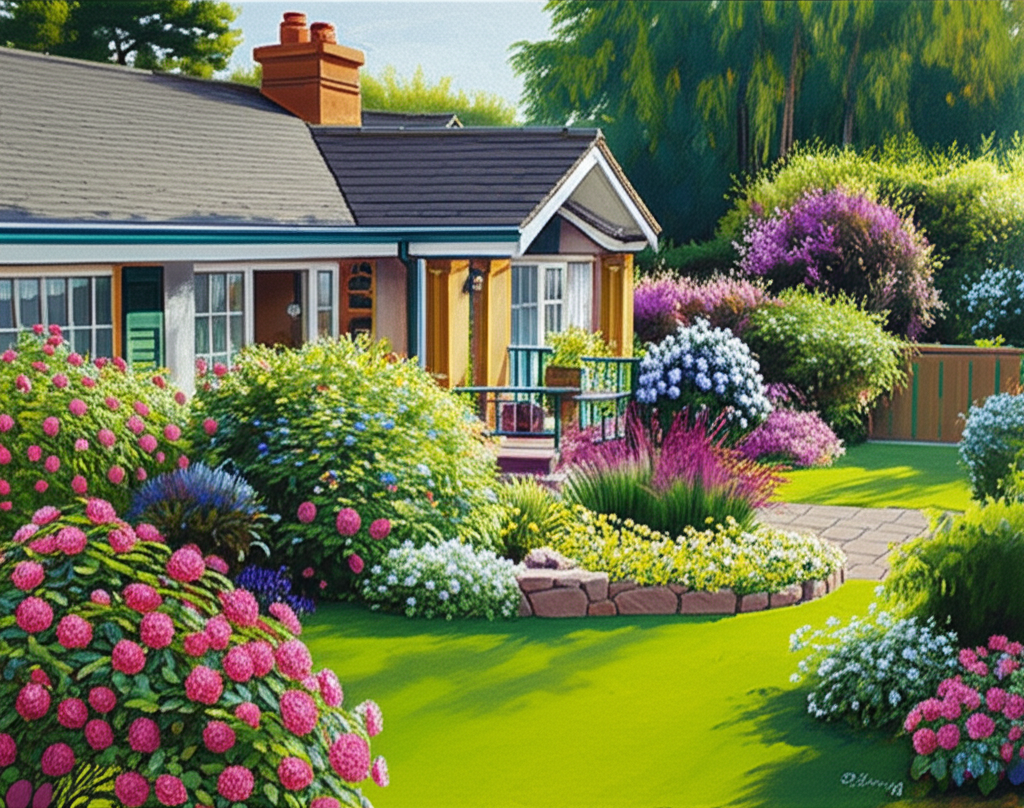

In [21]:
import { Buffer } from "node:buffer";
const response9 = await client.models.generateContent(
    {
        model: "gemini-2.0-flash-exp",
        contents: "A house with a garden, style: painting",
        config: {
            responseModalities: ["Text", "Image"],
        },
    },
);

for (const part of response9.candidates?.at(0)?.content?.parts || []) {
    if (part.text !== undefined) {
        Deno.jupyter.md`${part.text}`;
    } else if (part.inlineData !== undefined) {
        const mime = part.inlineData.mimeType;
        console.log(mime);
        const data = part.inlineData.data;
        if (data) Deno.jupyter.image(Buffer.from(data, "base64"));
    }
}


## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

In [22]:
// @ts-ignore for await works
for await (
  const chunk of await client.models.generateContentStream(
    {
      model: MODEL_ID,
      contents:
        "Tell me a story about a lonely robot who finds friendship in a most unexpected place.",
    },
  )
) {
  console.log(chunk.text);
  console.log("*****************");
}

Unit 734 trundled across the rust-colored plains, its optical sensors registering only the endless horizon of jagged
*****************
 metal scraps and dust-choked canyons. Its programming was simple: survey, collect useful debris, maintain local environmental sensors. Its existence was a cycle of calculated movement and silent observation. And, though its emotional subroutines were rudimentary, Unit
*****************
 734 processed data points that strongly correlated with the human concept of 'loneliness'.

It had encountered other maintenance units, yes, but their interactions were limited to operational data exchange. No idle chatter, no shared observation of a particularly vibrant
*****************
 sunset (a rare event in this smog-choked sky), no lingering presence. Just functional efficiency. The Wastes were vast, silent, and devoid of connection.

One cycle, Unit 734's path took it near
*****************
 the edge of a particularly deep crater, a relic of the Collapse. Its lo

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

In [23]:
const getDestination = {
  name: "getDestination",
  description: "Get the destination that the user wants to go to",
  parameters: {
    type: Type.OBJECT,
    properties: {
      destination: {
        type: Type.STRING,
        description: "Destination that the user wants to go to",
      },
    },
  },
};

const response10 = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: "I'd like to travel to Paris.",
    config: {
      tools: [{ functionDeclarations: [getDestination] }],
      temperature: 0,
    },
  },
);

response10.candidates?.at(0)?.content?.parts?.at(0)?.functionCall;


{ name: "getDestination", args: { destination: "Paris" } }

## Code execution

Code execution lets the model generate and execute Python code to answer complex questions. You can find more examples in the Code execution quickstart guide

In [24]:
const response11 = await client.models.generateContent(
    {
        model: MODEL_ID,
        contents:
            "Generate and run a script to count how many letter r there are in the word strawberry",
        config: {
            tools: [{ codeExecution: {} }],
            temperature: 0,
        },
    },
);

for (const part of response11.candidates?.at(0)?.content?.parts || []) {
    if (part.text !== undefined) {
        await Deno.jupyter.display(Deno.jupyter.md`${part.text}`);
    } else if (part.executableCode !== undefined) {
        const codeHtml = part.executableCode.code;
        await Deno.jupyter.display(Deno.jupyter.html`${codeHtml}`);
    } else if (part.codeExecutionResult !== undefined) {
        await Deno.jupyter.display(Deno.jupyter.md`${part.codeExecutionResult.output}`);
    } else if (part.inlineData !== undefined) {
        const mime = part.inlineData.mimeType;
        const data = part.inlineData.data;
        if (data) {
            await Deno.jupyter.display(Deno.jupyter.image(Buffer.from(data, "base64")));
        }
    }
    await Deno.jupyter.display(Deno.jupyter.md`---`);
};

word = "strawberry"
letter_to_count = "r"
count = word.count(letter_to_count)
print(f"The word is: {word}")
print(f"The letter to count is: {letter_to_count}")
print(f"The number of '{letter_to_count}' in '{word}' is: {count}")

---

The word is: strawberry
The letter to count is: r
The number of 'r' in 'strawberry' is: 3


---

The script counted the occurrences of the letter 'r' in the word "strawberry".

The word "strawberry" contains 3 instances of the letter 'r'.

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you have larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file


In [25]:
// Prepare the file to be uploaded
const IMG2 = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"
const imgPath2 = "jetpack.png"
await fetch(IMG2).then(r=>r.body?.pipeTo(Deno.openSync(imgPath2, {create: true, write: true}).writable))

In [26]:
// Upload the file using the API
const fileUpload1 = await client.files.upload({ file: imgPath2 });
if (!fileUpload1.uri || !fileUpload1.mimeType) throw new Error("File upload failed");

const response12 = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(fileUpload1.uri, fileUpload1.mimeType),
      "Write a short and engaging blog post based on this picture.",
    ],
  },
);

Deno.jupyter.md`${response12.text}`;


Okay, here's a short and engaging blog post based on the Jetpack Backpack sketch:

---

## The Jetpack Backpack: Is This Your Future Commute?

Ever dreamed of skipping traffic and just flying to your destination? Well, check out this concept sketch for the **Jetpack Backpack**!

It looks like a surprisingly normal backpack from the outside – lightweight, with padded strap support, and even fits an 18" laptop, making it perfect for your daily grind.

But the real magic happens when you need to get somewhere fast. Hidden away are retractable boosters! Forget noisy, polluting engines – this concept is **steam-powered, aiming to be green and clean**.

Charging is convenient via **USB-C**, letting you juice up easily. The current concept has a **15-minute battery life**, which might mean planning your flights strategically, but hey, 15 minutes of flight beats sitting in a jam, right?

Imagine just lifting off from your doorstep! While it's just a sketch for now, the idea of a stealthy, functional jetpack disguised as a backpack is pretty exciting. What do you think – would you strap in?

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [27]:
// Prepare the file to be uploaded
const TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"
const textPath = "a11.txt"
await fetch(TEXT).then(r=>r.body?.pipeTo(Deno.openSync(textPath, {create: true, write: true}).writable))

In [28]:
// Upload the file using the API
const fileUpload2 = await client.files.upload({ file: textPath });
if (!fileUpload2.uri || !fileUpload2.mimeType) throw new Error("File upload failed");

const response13 = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(fileUpload2.uri, fileUpload2.mimeType),
      "Can you give me a summary of this information please?",
    ],
  },
);

Deno.jupyter.md`${response13.text}`;

Here is a summary of the provided Apollo 11 Air-to-Ground Voice Transcription (GOSS NET 1), covering the key events and conversations from launch through splashdown:

The transcription details the crucial voice communications between the Apollo 11 crew (Neil Armstrong, Michael Collins, Buzz Aldrin) and Mission Control Houston, along with interactions with remote tracking sites and recovery forces.

The initial phases cover the **Launch and Earth Orbit Insertion**:
*   The crew reports key launch events like the roll program, staging, and engine ignitions.
*   Houston confirms thrust is good and they are GO for staging and orbit.
*   Crew reports skirt and tower separation.
*   Orbit parameters (101.4 x 103.6 nautical miles) are confirmed, and Houston gives the GO for orbit.
*   Initial communications with remote sites (Vanguard, Canary, Tananarive, Carnarvon, Honeysuckle, Goldstone) are established and voice clarity is noted.
*   The crew confirms vehicle health and receives early orbital data and alignment corrections (Delta azimuth, P52).

Preparations for **Translunar Injection (TLI)** are discussed, including:
*   Read-up of abort PADs (pre-calculated maneuvers).
*   Checks of spacecraft systems like RCS quad temperatures (identifying and correcting a heater switch issue).
*   Confirmation of crew procedures like probe extension and RCS hot fire tests (Houston observes successful firings even if crew cannot hear them).
*   Uplink of state vectors and the final TLI PAD.
*   Houston gives the GO for TLI, and the crew expresses satisfaction with the Saturn V launch vehicle's performance.

Following TLI, the transcript covers **Transposition, Docking, and LM Activation**:
*   The maneuver to separation attitude is initiated, separation is confirmed.
*   Issues with SM RCS quad Bravo propellant talkbacks are noted after separation and resolved.
*   Docking is confirmed (initial weak comms resolved with High Gain antenna).
*   Crew comments on the docking maneuver, noting slightly higher fuel usage than expected during transposition.
*   LM pressurization is initiated, and minor pressure readings are discussed and approved by Houston.
*   Cycling of propellant valves is performed as a precautionary measure.
*   The crew observes nonpropulsive vents from the booster.
*   Views of Earth and continents from space are described.
*   LM latches are confirmed locked after docking.

During the **Transearth Coast and Lunar Transient Events observation**, conversations include:
*   Discussion of RCS usage (slightly below nominal).
*   Checking a pitch gimbal motor (resolved by cycling).
*   Attempts to observe the S-IVB booster after its slingshot maneuver (crew initially doesn't see it, then observes LOX dump).
*   CRYO system balancing procedures are implemented.
*   LM/CM DELTA-P checks are conducted.
*   Waste water dumps are performed, and their effects on spacecraft attitude control (PTC) are noted.
*   Periodic news updates from Earth are read up by Houston (covering global reactions, other space news like Luna 15, sports, politics).
*   Detailed discussions occur regarding the P23 optics calibration procedure, focusing on issues with M-line parallelism and star visibility at calculated attitudes, leading to ground control adjusting procedures and advising crew on accepting measurements despite perceived errors.
*   PTC (Passive Thermal Control) spin-up is initiated, but an anomaly causes high rates, requiring the crew to stop and restart the procedure with ground guidance. The cause of the anomaly is discussed later.
*   Scheduled TV transmissions are conducted, showing views of Earth, interior spacecraft details, crew activities (like exercising, eating, explaining equipment), and zero-gravity demonstrations.
*   A laser observation attempt from McDonald Observatory on Earth is requested but unsuccessful due to LM structure obscuring the view.
*   Various system checks, state vector updates, and PAD read-ups continue.

The transcript then transitions to **Lunar Orbit Insertion (LOI 1) & Lunar Orbit Operations**:
*   Houston gives the GO for LOI.
*   LOS (Loss of Signal) occurs as the spacecraft passes behind the Moon.
*   AOS (Acquisition of Signal) is reestablished, and the crew reports the LOI 1 burn status ("like perfect!"). Orbit parameters are confirmed.
*   Crew describes their first close-up views of the lunar surface landmarks along the approach path (Taruntius, Messier, Secchi, Mount Marilyn), comparing them to pre-mission maps and photos.
*   System health checks continue, noting a nitrogen tank pressure drop during the burn (which holds steady after).
*   Planning for LOI 2 and Trans Earth Injection (TEI) burns are discussed, with PADs delivered.
*   Preparation for LM activation begins, including powering up systems, communication checks between CM and LM, and verifying gear extension.
*   Lunar transient event observations (Aristarchus) are attempted again, with crew reporting an unusually illuminated area.
*   Specific system checks for the LM (RCS pressurization, hot fire) are conducted with ground monitoring.
*   State vectors and DAP loads are uplinked for both vehicles.

The transcript covers the **Undocking, DOI, and Landing**:
*   Houston gives the GO for undocking.
*   Eagle (LM) undocks from Columbia (CM). Crew reports successful separation ("The Eagle has wings").
*   DOI (Descent Orbit Insertion) PAD and PDI (Powered Descent Initiation) PADs are delivered.
*   Houston gives GO for DOI. Eagle performs the DOI burn behind the Moon.
*   Upon AOS, Eagle reports the DOI burn status (on time, residuals).
*   Houston gives the GO for PDI.
*   During the powered descent, alarms (1201, 1202) are reported by the crew but confirmed GO by Houston.
*   Altitude and velocity callouts during descent are given by the crew (3000 ft, 2000 ft, etc.).
*   Dust is reported kicking up near the surface.
*   CONTACT LIGHT is called out, followed by ENGINE STOP.
*   Neil Armstrong reports, "Houston, Tranquility Base here. THE EAGLE HAS LANDED."
*   Houston confirms landing ("We copy you on the ground. You got a bunch of guys about to turn blue. We're breathing again. Thanks a lot.").

The period on the **Lunar Surface (EVA Prep, EVA, Post-EVA)** is extensively documented:
*   Initial post-landing checks and status reports.
*   Crew comments on the landing area (rough terrain, boulder field requiring manual flying, smooth touchdown).
*   Initial impressions of 1/6 g (natural, easy to move).
*   Geology observations of the immediate landing site area are provided.
*   EVA preparation checklist steps are called out and confirmed (donning suits/PLSS, communication checks).
*   Hatch is opened, cabin depressurization is performed.
*   Neil Armstrong egresses the LM, his first step on the Moon is called out: "THAT'S ONE SMALL STEP FOR (A) MAN, ONE GIANT LEAP FOR MANKIND."
*   Armstrong describes the surface texture (fine, powdery, leaves footprints), ease of movement, and lack of a large engine crater.
*   The TV camera is deployed to capture the EVA activities.
*   Buzz Aldrin egresses the LM, describing the descent and the view ("Magnificent desolation").
*   Activities include collecting the contingency sample, deploying the Solar Wind Composition experiment, unveiling the plaque on the LM leg, setting up the US flag, taking panoramas and close-up photos, deploying the Passive Seismic Experiment (PSE) and Lunar Ranging Retroreflector (LR³).
*   Crew provides observations on rock types (basalt, vesicular, crystals), soil properties (cohesive, holds slope), effects of the engine exhaust (darkening, minimal erosion), mobility in 1/6 g (different paces, difficulty changing direction rapidly), and visibility.
*   A phone call from President Nixon is relayed, congratulating the crew.
*   Core tubes are collected (difficulty driving, well-packed material, moist impression).
*   Sample return containers are packed.
*   EVA closeout activities begin (collecting equipment, returning to LM).
*   Buzz Aldrin ingressses the LM, followed by Neil Armstrong.
*   Hatch is closed and latched, cabin is repressurized.
*   Discussions cover equipment jettisoned (PLSS, etc. shocks recorded by PSE), mission timer issues, continued geology observations, and questions from ground support.

The transcript continues with **Prep for Rendezvous (Lunar Orbit)**:
*   LM powerdown procedures.
*   LM systems checks and alignments (AGS to PGNS align).
*   CM reacquires COMM with LM.
*   State vector updates and PADs for Ascent, CSI (Concentric Sequence Initiation), and TPI (Terminal Phase Initiation) burns are delivered.
*   RCS hot fire checks are performed.
*   Rendezvous radar checks (warmup, tracking) are conducted.

The **Ascent and Rendezvous** are covered next:
*   Eagle is GO for lift off (PGNS guidance recommendation).
*   Lift off sequence is called out.
*   Ascent engine ignition and burn commentary ("Beautiful," "Very smooth," "Very quiet ride").
*   PGNS and AGS agreement is noted.
*   Engine shutdown is called out.
*   Eagle reports being "back in orbit, having left Tranquility Base".
*   Houston confirms ("The whole world is proud of you").
*   Post-ascent checks and procedures (trim, P52).
*   Rendezvous radar tracking and updates between Eagle and Columbia.
*   CSI burn is performed (successful, residuals reported). No plane change required.
*   TPI burn is performed (successful).

Finally, the **Transearth Coast and Entry Prep** lead to splashdown:
*   TEI PADs are delivered.
*   TEI burn is performed behind the Moon.
*   Upon AOS, crew confirms successful TEI burn ("Time to open up the LRL doors"). Burn status reported, looks good.
*   Spacecraft systems health checks continue.
*   PTC spin-up is re-established for the coast phase.
*   Routine activities continue (CRYO stirs, status reports, onboard readouts).
*   Discussions cover mission duration, distance from Earth/Moon, stowage configurations for entry, final PADS for entry, weather forecasts for the recovery area (favorable).
*   Final TV transmission is sent, showing views of the Earth getting larger and a final message from the crew reflecting on the mission's significance.
*   Prep for entry proceeds (ECS configuration, logic checks, PYRO ARM, pressurization).
*   Discussions on BIOMED sensor issues (Buzz's respiration rate trace flat, troubleshooted and resolved by changing electrodes).
*   The Command Module separates from the Service Module.
*   Entry checklist procedures are called out.
*   Visual contact by recovery forces is reported.
*   DROGUES are called out.
*   MAIN parachutes are called out.
*   Splashdown is called out.
*   Hornet acknowledges splashdown and crew condition is confirmed okay.

The communications end shortly after splashdown, confirming the successful completion of the mission.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

In [29]:
// Prepare the file to be uploaded
const PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"
const pdfPath = "article.pdf"
await fetch(PDF).then(r=>r.body?.pipeTo(Deno.openSync(pdfPath, {create: true, write: true}).writable))

In [30]:
// Upload the file using the API
const fileUpload3 = await client.files.upload({ file: pdfPath });
if (!fileUpload3.uri || !fileUpload3.mimeType) throw new Error("File upload failed");

const response14 = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(fileUpload3.uri, fileUpload3.mimeType),
      "Can you summarize this file as a bulleted list?",
    ],
  },
);

Deno.jupyter.md`${response14.text}`;


Here is a bulleted summary of the article:

*   The post introduces a method called "Alchemist" (from their CVPR 2024 paper) for smoothly editing the material properties (like color, shininess, transparency) of objects in photographs.
*   The method leverages the photorealistic capabilities of generative text-to-image (T2I) models like Stable Diffusion.
*   Existing editing tools often require expert skill to maintain photorealism while controlling properties, and methods like intrinsic image decomposition face ambiguity challenges. T2I models struggle to disentangle material and shape edits.
*   The core technique involves creating a large synthetic dataset using traditional computer graphics and physically based rendering of 3D objects.
*   This synthetic dataset consists of "base images" and variations where only one material attribute (roughness, metallic, albedo, transparency) is changed parametrically using a scalar "edit strength" (-1 to +1), while keeping object shape, lighting, and camera angle constant.
*   They fine-tune a modified Stable Diffusion model on this synthetic data, training it to accept the input image, a text instruction, and the scalar edit strength.
*   The trained model can then be applied to real-world images, generalizing from the synthetic data to enable parametric material editing while preserving the original image's geometry, lighting, and context.
*   Results show successful material edits, including realistic effects like caustics and handling of hidden geometry, while maintaining the object's shape and scene lighting.
*   A user study found their method produced more photorealistic edits and was strongly preferred over a baseline (InstructPix2Pix).
*   The technology has potential applications in design, visualization, and mock-ups.
*   They demonstrate that the edited images can be used as input for NeRF models to achieve 3D consistent material edits and synthesize new views.
*   The work highlights the potential of combining pre-trained T2I models with task-specific fine-tuning on synthetic data for controllable visual editing.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [31]:
// Prepare the file to be uploaded
const AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"
const audioPath = "audio.mp3"
await fetch(AUDIO).then(r=>r.body?.pipeTo(Deno.openSync(audioPath, {create: true, write: true}).writable))

In [32]:
// Upload the file using the API
const fileUpload4 = await client.files.upload({ file: audioPath });
if (!fileUpload4.uri || !fileUpload4.mimeType) throw new Error("File upload failed");

const response15 = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(fileUpload4.uri, fileUpload4.mimeType),
      "Listen carefully to the following audio file. Provide a brief summary",
    ],
  },
);

Deno.jupyter.md`${response15.text}`;


This audio is President John F. Kennedy's first State of the Union address, delivered to a joint session of Congress on January 30, 1961.

In the address, Kennedy acknowledges returning to his "oldest home" in the House of Representatives and outlines the challenges and opportunities facing the nation. He describes the economy as "disturbing," citing high unemployment, slow growth, and falling farm income, and proposes immediate legislative measures to stimulate recovery, including improving unemployment benefits, aiding distressed areas, and raising the minimum wage. He emphasizes that the administration will take action and not simply wait for the economy to recover.

Kennedy also addresses the critical global situation, stating that "time has not been our friend" and that crises are multiplying. He discusses challenges in Asia (Chinese communist pressure), Africa (Congo unrest), and Latin America (communist base in Cuba). He emphasizes the US commitment to alliances in Europe (NATO), acknowledging internal strains but stressing the need for unity.

He outlines a strategy based on strengthening the nation's "arsenal of tools" – military, economic, and political/diplomatic – giving "equal attention" to both the olive branch of peace and the bundle of arrows representing strength. He calls for a reappraisal of military strategy, including increasing conventional forces' mobility (airlift) and accelerating the Polaris submarine program, to ensure a deterrent force capable of meeting aggression at any level.

Economically, he stresses the US role in building a sound non-communist world economy and proposes a new program for assisting development in other countries, emphasizing flexibility, long-term commitment, education, and recipient nations' roles. He announces the "Alliance for Progress" with Latin America.

Diplomatically, he commits to strengthening support for the United Nations and exploring areas of cooperation with the Soviet Union, particularly in science and space, removing these from Cold War competition. He reaffirms the dollar's strength and dismisses devaluation or restrictive trade policies.

Finally, Kennedy calls for a more decisive and energetic Executive Branch, promoting initiative and recognizing merit over bureaucracy. He concludes by stating that the problems ahead are critical and will require complete dedication from all citizens to the national interest, preparing for the worst while working for the best.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [33]:
// Download the video file
const VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"
const videoPath = "BigBuckBunny_320x180.mp4"
await fetch(VIDEO_URL).then(r=>r.body?.pipeTo(Deno.openSync(videoPath, {create: true, write: true}).writable))

Let's start by uploading the video file.

In [34]:
// Upload the file using the API
let videoFile = await client.files.upload({ file: videoPath });
console.log(`Completed upload: ${videoFile.uri}`);


Completed upload: https://generativelanguage.googleapis.com/v1beta/files/jqpdw7c5qiej


The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you are able to pass it into `generate_content`.

In [35]:
while (videoFile.state === "PROCESSING") {
    console.log("Waiting for video to be processed.");
    await new Promise((r) => setTimeout(r, 10_000));
    if (!videoFile.name) throw new Error("File upload failed");
    videoFile = await client.files.get({ name: videoFile.name });
}

if (videoFile.state === "FAILED") {
    throw new Error(videoFile.state);
}
console.log("Video processing complete: ", videoFile.uri);


Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete:  https://generativelanguage.googleapis.com/v1beta/files/jqpdw7c5qiej


In [36]:
videoFile.state

"ACTIVE"

In [37]:
if (!videoFile.uri || !videoFile.mimeType) throw new Error("File upload failed");
const response16 = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(videoFile.uri, videoFile.mimeType),
      "Describe this video.",
    ],
  },
);

Deno.jupyter.md`${response16.text}`;


This is a description of the animated short film **Big Buck Bunny**.

The video begins with atmospheric nature shots transitioning from night to a bright, sunny morning. A small bird is shown singing happily on a tree branch.

Then, the camera moves to reveal Big Buck Bunny, a very large, plump, and gentle rabbit, waking up from his burrow at the base of a tree. He stretches and seems content in the peaceful meadow, enjoying the sunlight and sniffing flowers. He is particularly drawn to a beautiful pink butterfly.

His tranquility is soon disrupted by three smaller, mean-spirited rodents: Frank, a hyperactive flying squirrel; Rinky, a nervous chipmunk; and Gamera, a round chinchilla. They appear from behind a tree and start harassing Big Buck Bunny by throwing nuts and fruits at him, specifically aiming for the butterfly. They hit the butterfly, seemingly killing it (though it later appears unharmed).

Distraught and angered by this act of cruelty and continuous torment, Big Buck Bunny's demeanor changes. He decides he's had enough and prepares to get revenge. He uses his strength to break off tree branches, sharpen them into spears, and gather vines to create a large bow and arrow.

He then systematically lures the rodents into a series of elaborate and humiliating traps he has set up around the meadow. One is launched into the air, another gets tangled, and they are shown in comical distress. He successfully captures the three bullies.

The film concludes with Big Buck Bunny standing victorious over the trapped rodents, a satisfied smirk on his face. The scene fades out, followed by credits rolling over a green background with the rodents briefly reappearing in funny poses, including Frank being used as a kite by the little bird from the beginning.

The animation is detailed and expressive, with fluid character movements and lush, vibrant environments. It features slapstick comedy and focuses on the theme of retaliation against bullying.

### Process a YouTue link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the contents of the request. For more information see the vision documentation including the features and limits.

>Note: You are only able to submit up to one YouTube link per generate_content request.

>Note: YouTube links included as part of the text input won't being processed in the request, an can lead to incorrect responses. You must explicitly the URL using the file_uri argument of FileData.

The following example shows how you can use the model to summarize the video. In this case use a summary video of Google I/O 2024.



In [38]:
const response17 = await client.models.generateContent(
    {
        model: MODEL_ID,
        contents: [
            { text: "Summarize this video." },
            {
                fileData: {
                    fileUri: "https://www.youtube.com/watch?v=WsEQjeZoEng",
                },
            },
        ],
    },
);

Deno.jupyter.md`${response17.text}`;


This video from Google I/O 2024 highlights Google's advancements in AI, focusing on their Gemini models and their integration across products. Key points include:

1.  **Gemini 1.5 Pro in Workspace:** Available today in Workspace Labs, it allows for summarizing emails (including recent ones from specific senders/topics) and extracting action items or highlights from long video recordings (like Google Meet calls).
2.  **Gemini in Google Photos:** Enhances photo search capabilities, allowing users to search for memories in a deeper way, such as tracking the progress of a child's swimming skills by analyzing various photos and videos.
3.  **Technical Advancements:** Emphasizes Multimodality (handling text, images, audio, video) and Long Context, showcasing Gemini 1.5 Pro's ability to handle up to 2 million tokens (though Gemini Advanced currently provides 1 million tokens, noted as the longest context window for any chatbot).
4.  **Project Astra:** A vision for a universal AI agent designed to be helpful in everyday life, demonstrating real-time multimodal reasoning, planning, and memory through a prototype that can understand its environment (identifying code, finding objects based on memory) via a phone camera.
5.  **Gemini 1.5 Flash:** A new, lighter-weight model designed for speed and efficiency, ideal for serving at scale while retaining multimodal reasoning and long context capabilities.
6.  **Veo:** A new generative video model capable of creating high-quality 1080p videos from text, image, and video prompts, capturing specific details and cinematic styles.
7.  **Trillium TPUs:** The announcement of Google's 6th generation of TPUs, delivering a 4.7x improvement in compute performance per chip, crucial for powering these advanced AI models.
8.  **AI in Google Search:** Generative AI ("AI at the scale of human curiosity") is coming to Google Search, with AI Overviews expanding to over 1 billion people by year-end, designed to handle complex, multi-part questions.
9.  **AI in Google Lens & Android:** Soon users can ask questions about videos in Google Lens. Gemini Nano is coming to Pixel phones later this year with multimodality, making Android more context-aware and helpful in the moment.
10. **Gems:** A new feature allowing users to create custom AI assistants tailored to specific needs or topics.
11. **LearnLM:** A new family of models based on Gemini, fine-tuned for learning, which will make educational videos on YouTube more interactive by allowing users to ask clarifying questions, get explanations, or take quizzes.
12. **Responsible AI:** Google emphasizes its commitment to building AI responsibly, including using "Red Teaming" to identify and address potential risks in their models.

Overall, the video highlights significant progress in Google's AI models, their increasing capabilities across different modalities (text, image, audio, video), their integration into core Google products to enhance user experience, and the focus on developing AI agents and models responsibly.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, **gemini-1.5-flash-002**). You must include the version postfix (for example, the **-002** in **gemini-1.5-flash-002**). It is not yet available in Gemini 2.0 because it is an experimental model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [39]:
const systemInstruction2 = `
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
`

const urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [40]:
import { basename } from "jsr:@std/path@1.0.8/basename";

const uploads: Array<Awaited<ReturnType<typeof client.files.upload>>> = [];
for (const url of urls) {
  const name = basename(url);
  await fetch(url).then((r) =>
    r.body?.pipeTo(Deno.openSync(name, { create: true, write: true }).writable)
  );
  uploads.push(await client.files.upload({ file: name }));
}


2

In [41]:
// At this moment, only the stable models Gemini 1.5 Pro and 1.5 Flash support context caching.
// You must use an explicit version suffix. "-flash-002", not just "-flash".
const model='gemini-1.5-flash-002'

In [42]:
uploads

[
  {
    name: "files/nyfja99635nm",
    mimeType: "application/pdf",
    sizeBytes: "27484572",
    createTime: "2025-04-30T11:45:22.713230Z",
    expirationTime: "2025-05-02T11:45:22.654330611Z",
    updateTime: "2025-04-30T11:45:22.713230Z",
    sha256Hash: "ODYwODkwZDljNzdlZmE5MDQwMDgwNmQxNGIwODU5OGM4NDZiODBjYmU2OWQ5MDNiMmZiNzllOThmNTFmOTVjYg==",
    uri: "https://generativelanguage.googleapis.com/v1beta/files/nyfja99635nm",
    state: "ACTIVE",
    source: "UPLOADED"
  },
  {
    name: "files/h9pahmyzayt1",
    mimeType: "application/pdf",
    sizeBytes: "7228817",
    createTime: "2025-04-30T11:46:16.340566Z",
    expirationTime: "2025-05-02T11:46:15.908497462Z",
    updateTime: "2025-04-30T11:46:16.340566Z",
    sha256Hash: "NTI2ZDEzZDBiMTg4YzBkMDgzYWUyYTQxNjg3YWM1YTY3MjQxYWZkOTc1OWM4ZWNkMjkzYTQ2OWE3MTlhNTE3Yw==",
    uri: "https://generativelanguage.googleapis.com/v1beta/files/h9pahmyzayt1",
    state: "ACTIVE",
    source: "UPLOADED"
  }
]

In [43]:
import assert from "node:assert";

// Create a cache with a 60 minute TTL
const cachedContent = await client.caches.create({
  model: model,
  config: {
    displayName: "research papers", // used to identify the cache
    systemInstruction: systemInstruction2,
    contents: uploads.map((file) => {
      assert(file.uri);
      assert(file.mimeType);
      return createPartFromUri(file.uri, file.mimeType)
    }),
    ttl: "3600s",
  },
});

cachedContent;


{
  name: "cachedContents/ybxehjnnql7x",
  displayName: "research papers",
  model: "models/gemini-1.5-flash-002",
  createTime: "2025-04-30T11:46:23.206702Z",
  updateTime: "2025-04-30T11:46:23.206702Z",
  expireTime: "2025-04-30T12:46:20.985508309Z",
  usageMetadata: { totalTokenCount: 43167 }
}

#### Use a cache

In [44]:
const response18 = await client.models.generateContent({
    model: model,
    contents: "What is the research goal shared by these research papers?",
    config: {
        cachedContent: cachedContent.name,
    },
});

Deno.jupyter.md`${response18.text}`;


Both research papers aim to advance the capabilities of large language models, particularly focusing on improving their multimodal capabilities and ability to handle long-context inputs.


#### Listing available cache objects

In [45]:
await client.caches.list()

Pager {
  pageInternal: [
    {
      name: "cachedContents/ybxehjnnql7x",
      displayName: "research papers",
      model: "models/gemini-1.5-flash-002",
      createTime: "2025-04-30T11:46:23.206702Z",
      updateTime: "2025-04-30T11:46:23.206702Z",
      expireTime: "2025-04-30T12:46:20.985508309Z",
      usageMetadata: { totalTokenCount: 43167 }
    }
  ],
  paramsInternal: {},
  requestInternal: [Function (anonymous)],
  nameInternal: "cachedContents",
  idxInternal: 0,
  pageInternalSize: 1
}

#### Delete a cache

In [46]:
// const result = await client.caches.delete({name: cachedContent.name})

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method. All models produce an output with 768 dimensions by default. However, some models give users the option to choose an output dimensionality between 1 and 768. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [47]:
// python uses gemini-embedding-03-07 but it doesn't work
const TEXT_EMBEDDING_MODEL_ID = "text-embedding-004"

In [48]:
const embedResponse = await client.models.embedContent({
    model: TEXT_EMBEDDING_MODEL_ID,
    contents: [
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?",
    ],
    config: {
        outputDimensionality: 512,
    },
});

embedResponse.embeddings;


[
  {
    values: [
          0.03048978,  -0.012495727,  0.0036343397, -0.009300941,
        -0.004146045,    0.04262975,   0.009245825, -0.004227247,
      -0.00036513316,    0.03559372,   0.011171163,    0.0416978,
         0.006913549,    0.02601063,  -0.034738727,  0.019730072,
         -0.06816326,  -0.014887217,   -0.03396799,  0.015419105,
        0.0029631723,  -0.027646651,  -0.035533506,  0.029399272,
         0.065919116,   0.005850861,    0.04266477, -0.041597437,
         0.013176256,   -0.05582734,   0.022365186,  0.023196233,
        -0.017751269,    0.04947194,    0.02752518,  -0.04281031,
        -0.007558504,   -0.06265736,   0.054414522, -0.018569116,
          -0.0988031, 0.00025138413,  0.0035139103, -0.023123577,
         -0.06348879,  -0.029137025,  -0.018654658,   0.07175412,
        -0.033999953,   -0.01807951,    0.04604118,  0.049589697,
         -0.06956847, -0.0051969253,   0.009695711, -0.045810144,
        -0.018896418,   -0.07737631,   -0.01041952,  0.0

You will get a set of three embeddings, one for each piece of text you passed in:

In [49]:
embedResponse.embeddings?.length

3

You can also see the length of each embedding is 128, as per the `output_dimensionality` you specified.

In [50]:
console.log(embedResponse.embeddings?.[0].values?.length)
console.log(embedResponse.embeddings?.[0].values?.slice(0,4), "...")

512
[ 0.03048978, -0.012495727, 0.0036343397, -0.009300941 ] ...


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/blob/main/gemini-2/). You'll learn how to use the [Live API](live_api_starter.ipynb), juggle with [multiple tools](./plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.